In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
pd.set_option('display.max_columns', 40)

### Cervical cancer (Risk Factors) Data Set
[Link](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29)   

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

(int) Age  
(int) Number of sexual partners  
(int) First sexual intercourse (age)  
(int) Num of pregnancies  
(bool) Smokes  
(bool) Smokes (years)  
(bool) Smokes (packs/year)  
(bool) Hormonal Contraceptives  
(int) Hormonal Contraceptives (years)  
(bool) IUD  
(int) IUD (years)  
(bool) STDs  
(int) STDs (number)  
(bool) STDs:condylomatosis  
(bool) STDs:cervical condylomatosis  
(bool) STDs:vaginal condylomatosis  
(bool) STDs:vulvo-perineal condylomatosis  
(bool) STDs:syphilis  
(bool) STDs:pelvic inflammatory disease  
(bool) STDs:genital herpes  
(bool) STDs:molluscum contagiosum  
(bool) STDs:AIDS  
(bool) STDs:HIV  
(bool) STDs:Hepatitis B  
(bool) STDs:HPV  
(int) STDs: Number of diagnosis  
(int) STDs: Time since first diagnosis  
(int) STDs: Time since last diagnosis  
(bool) Dx:Cancer  
(bool) Dx:CIN  
(bool) Dx:HPV  
(bool) Dx  
(bool) Hinselmann: target variable  
(bool) Schiller: target variable  
(bool) Cytology: target variable  
(bool) Biopsy: target variable

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values = '?')
print('Dataset shape: ', df.shape)
df.head()

Dataset shape:  (858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [4]:
#Удаляем переменные с большим кольчество пропусков
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1, inplace = True)

(array([ 6., 21., 58., 50., 89., 46., 30., 93., 39., 71., 37., 68., 27.,
        18., 52., 29., 41.,  9.,  9., 25.,  6., 11.,  6.,  4.,  2.,  2.,
         2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([13.  , 14.42, 15.84, 17.26, 18.68, 20.1 , 21.52, 22.94, 24.36,
        25.78, 27.2 , 28.62, 30.04, 31.46, 32.88, 34.3 , 35.72, 37.14,
        38.56, 39.98, 41.4 , 42.82, 44.24, 45.66, 47.08, 48.5 , 49.92,
        51.34, 52.76, 54.18, 55.6 , 57.02, 58.44, 59.86, 61.28, 62.7 ,
        64.12, 65.54, 66.96, 68.38, 69.8 , 71.22, 72.64, 74.06, 75.48,
        76.9 , 78.32, 79.74, 81.16, 82.58, 84.  ]),
 <a list of 50 Patch objects>)

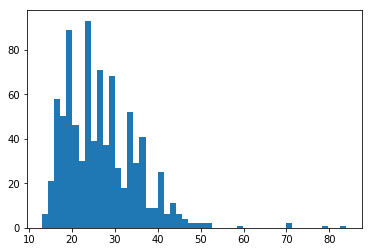

In [5]:
plt.hist(df.Age, bins = 50)

In [6]:
df['AgeGroup'] = 0
df['AgeGroup'] = np.where(df.Age<= 20, 0, df.AgeGroup)
df['AgeGroup'] = np.where((df.Age>20)&(df.Age <=30), 1, df.AgeGroup)
df['AgeGroup'] = np.where((df.Age>30)&(df.Age <=40), 2, df.AgeGroup)
df['AgeGroup'] = np.where((df.Age>40)&(df.Age <=50), 3, df.AgeGroup)
df['AgeGroup'] = np.where((df.Age>50), 4, df.AgeGroup)
df.drop(['Age'], axis = 1, inplace = True)

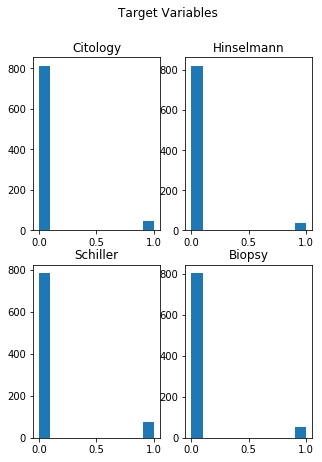

In [7]:
plt.figure(figsize=(5, 7))

plt.subplot(221)
plt.title('Citology')
plt.hist(df.Citology)
plt.subplot(222)
plt.title('Hinselmann')
plt.hist(df.Hinselmann)
plt.subplot(223)
plt.title('Schiller')
plt.hist(df.Schiller)
plt.subplot(224)
plt.title('Biopsy')
plt.hist(df.Biopsy)
plt.suptitle('Target Variables')
plt.show()

Все эти переменные - результаты неких диагностических тестов. Посмотрим, какая из них наиболее чувствительна к выдаче положительного диагноза. 
Для нашей модели в данном случае будет более предпочтителен ложноположительный результат, чем ложноотрицательный.

Поэтому создадим новую переменную, которая будет иметь значение target = 1, если хотя бы один из тестов дал положительный результат.

In [8]:
df['target'] = 0
df['target'] = np.where(((df['Schiller']==1)|(df['Hinselmann']==1)|(df['Citology']==1)|(df['Biopsy']==1)), 1, 0) 

# df[['Citology', 'Hinselmann', 'Schiller', 'Biopsy']][(df['Schiller']==0)&
#                                                      (
#                                                          (df['Hinselmann']==1)|
#                                                          (df['Citology']==1)|
#                                                          (df['Biopsy']==1))].count()

In [9]:
df.drop(['Citology', 'Hinselmann', 'Schiller', 'Biopsy'], axis = 1, inplace = True)

In [10]:
df.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,AgeGroup,target
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,2,0
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,4,0
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,3,0


D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


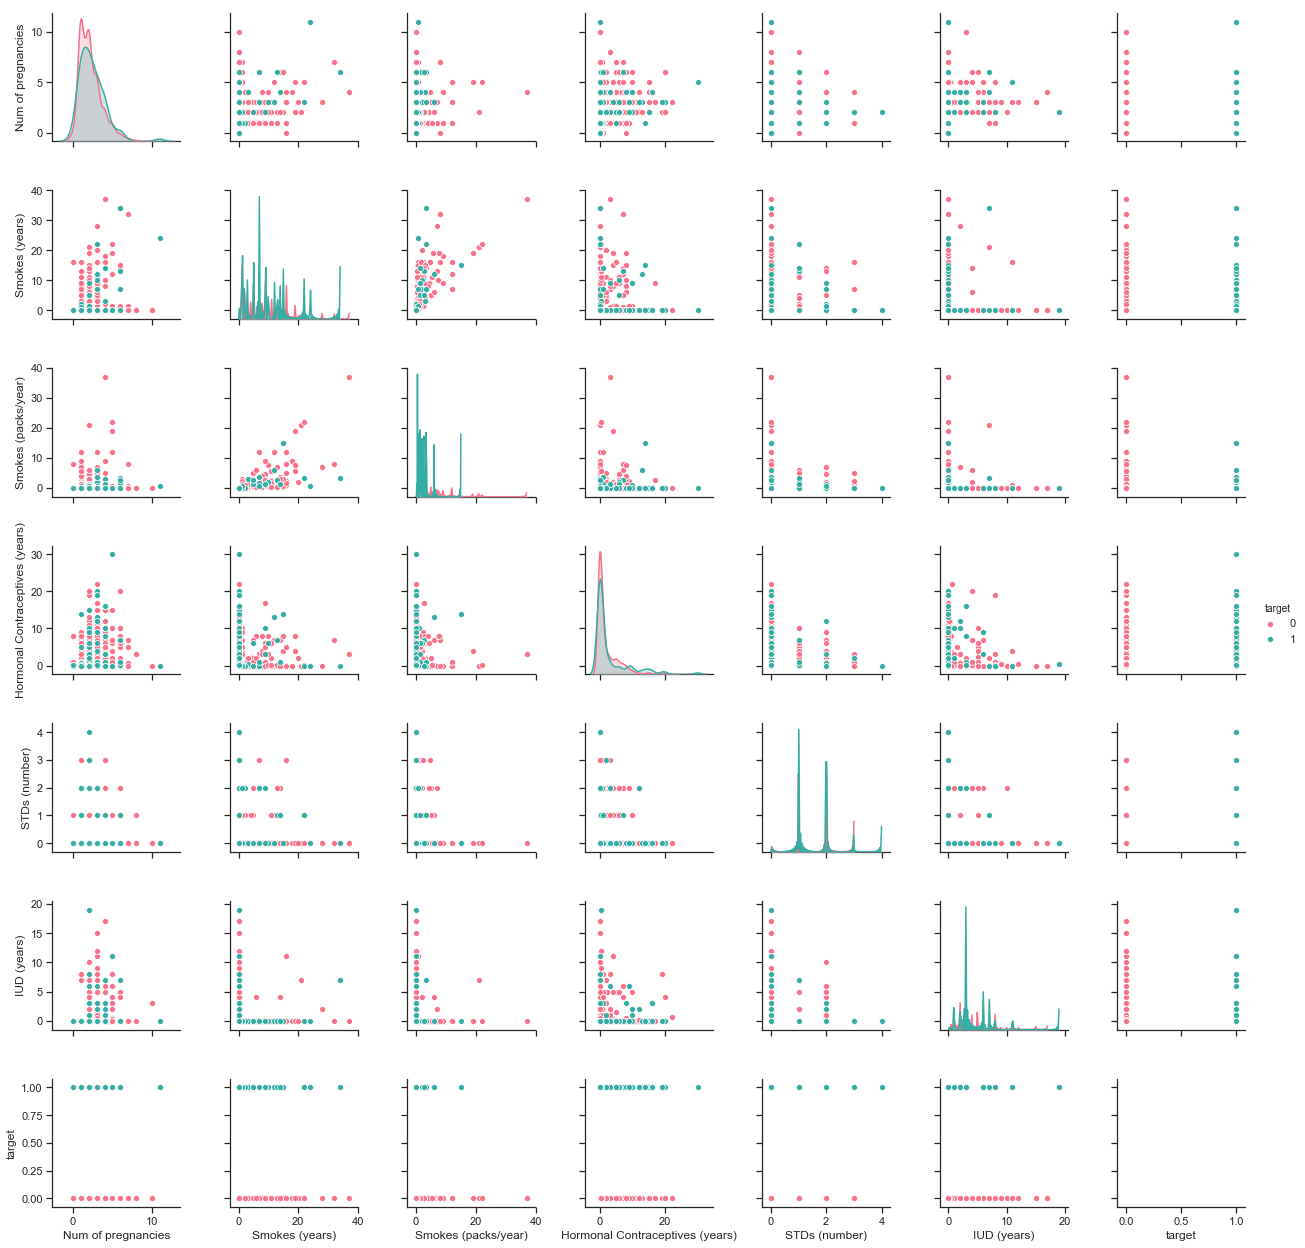

In [11]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(df[[
        'Num of pregnancies',
        'Smokes (years)',
        'Smokes (packs/year)',
        'Hormonal Contraceptives (years)',
        'STDs (number)',
        'IUD (years)', 
        'target']], hue="target",  palette="husl")

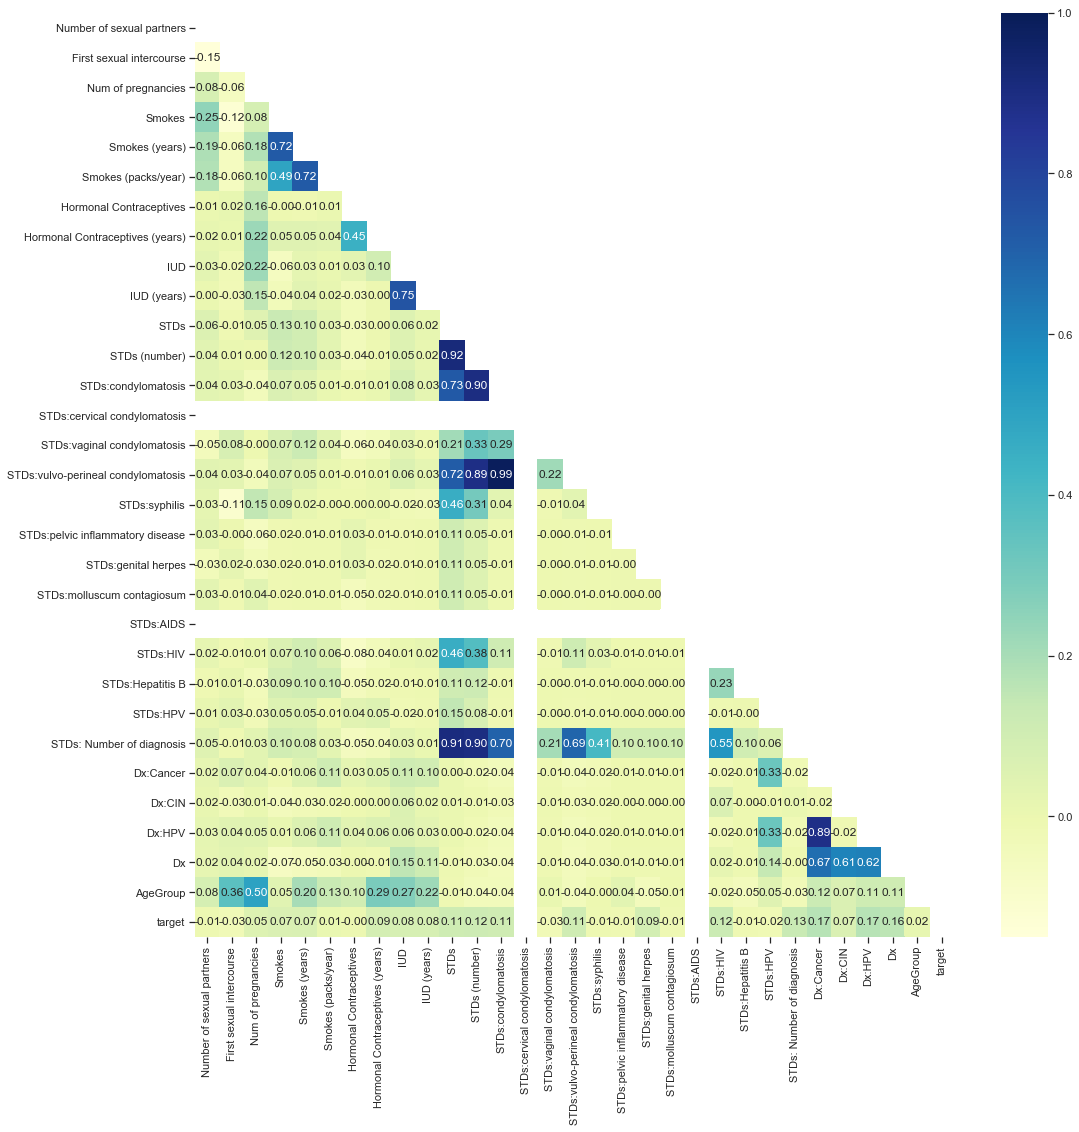

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(17,17));
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,mask = mask, annot=True, cmap="YlGnBu", fmt='.2f')

In [13]:
df.drop(['STDs:vulvo-perineal condylomatosis', 'STDs: Number of diagnosis', 'Dx'], axis = 1, inplace = True)

In [14]:
df.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,AgeGroup,target
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,4,0
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,0


In [15]:
df.describe()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,AgeGroup,target
count,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.020979,0.010490,0.020979,1.101399,0.118881
std,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.143398,0.101939,0.143398,0.880343,0.323837
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# First sexual intercourse
# 25% - 15, 50% - 17, 75% - 18
df['First sexual intercourse'] = np.where(df['First sexual intercourse']<=15, 0, df['First sexual intercourse'])
df['First sexual intercourse'] = np.where((df['First sexual intercourse']>15)&(df['First sexual intercourse']<=17), 1, df['First sexual intercourse'])
df['First sexual intercourse'] = np.where((df['First sexual intercourse']>17)&(df['First sexual intercourse']<=18), 2, df['First sexual intercourse'])
df['First sexual intercourse'] = np.where((df['First sexual intercourse']>18), 3, df['First sexual intercourse'])
df['First sexual intercourse'] = np.where(df['First sexual intercourse'].isna(), 1, df['First sexual intercourse'])
df['First sexual intercourse'] = df['First sexual intercourse'].astype(np.int)

In [17]:
variables = ['Num of pregnancies', 'Number of sexual partners', 'Hormonal Contraceptives (years)']

for i in variables:    
    df[i] = np.where(df[i].isna(), df[i].median(), df[i])

In [18]:
variables = ['Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'IUD', 'IUD (years)', 'STDs',
            'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:syphilis',
             'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
             'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV']
for i in variables:    
    df[i] = np.where(df[i].isna(), 0, df[i])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 28 columns):
Number of sexual partners           858 non-null float64
First sexual intercourse            858 non-null int32
Num of pregnancies                  858 non-null float64
Smokes                              858 non-null float64
Smokes (years)                      858 non-null float64
Smokes (packs/year)                 858 non-null float64
Hormonal Contraceptives             858 non-null float64
Hormonal Contraceptives (years)     858 non-null float64
IUD                                 858 non-null float64
IUD (years)                         858 non-null float64
STDs                                858 non-null float64
STDs (number)                       858 non-null float64
STDs:condylomatosis                 858 non-null float64
STDs:cervical condylomatosis        858 non-null float64
STDs:vaginal condylomatosis         858 non-null float64
STDs:syphilis                       858 no

In [20]:
data_describe = df.describe()
binary_columns    = [c for c in df.columns if df[c].nunique() == 2]
nonbinary_columns = [c for c in df.columns if df[c].nunique() > 2]
print('Binary variables: ', binary_columns)
print('_'*100)
print('Nonbinary variables: ', nonbinary_columns)

Binary variables:  ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'target']
____________________________________________________________________________________________________
Nonbinary variables:  ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'AgeGroup']


In [21]:
nonbinary_columns.remove('First sexual intercourse')
nonbinary_columns.remove('AgeGroup')

In [22]:
df[nonbinary_columns] = (df[nonbinary_columns] - df[nonbinary_columns].mean()) / (df[nonbinary_columns].std()) 

In [23]:
df.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,AgeGroup,target
0,0.904902,0,-0.897639,0.0,-0.295827,-0.201904,0.0,-0.570594,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,-0.919074,0,-0.897639,0.0,-0.295827,-0.201904,0.0,-0.570594,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,-0.919074,1,-0.897639,0.0,-0.295827,-0.201904,0.0,-0.570594,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0
3,1.512894,1,1.243717,1.0,8.816077,16.537516,1.0,0.270439,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,4,0
4,0.296910,3,1.243717,0.0,-0.295827,-0.201904,1.0,3.634573,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,0


### Идея AdaBoost

Общая идея бустинга наиболее просто объясняется алгоритмом AdaBoost (сокр. Adaptive Boosting), которая была инициализирована ранее других. Она состоит в том, чтобы на основе ансамбля из нескольких слабых алгоритмов получить один хороший алгоритм.

Основная идея AdaBoost заключается как раз в этом: 

Допустим, что мы обучим алгоритм с определенной долей вероятности предсказывать метки класса. Запустим его обучение, подучим результат.

После этого мы увеличим веса при метках, которые были распознаны неверно, соответственно ошибка при их неправильном распознавании будет выше. Поэтому следующий классификатор вероятнее всего будет обучен так, что распознает их. Этот процесс повторяется, пока функция ошибки не перестанет меняться или пока не будет достигнуто максимальное число предикторов.

Затем мы складываем с некоторыми весами все наши обученные модели и получаем сильный алгоритм классификации из ансамбля более слабых моделей.
    
   
<img src= "./Screenshot_6.png">

**XGBoost, CatBoost, LightGBM**

Три самые популярные реализации алгоритма градиентного бустинга - это XGBoost, CatBoost, LightGBM
<img src= "./Screenshot_11.png">

In [41]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Вот шаги реализации алгоритма AdaBoost:
1. Изначально всем точкам присвоены равные веса
2. Модель строится на подвыборке данных.
3. По этой модели получаются предсказания для всех данных.
4. По предсказаниям и истинным значениям вычисляются ошибки.
5. В построении следующей модели наибольшие веса присваиваются точкам данных, на предсказании которых алгоритм ошибся.
6. Веса могут быть определены по величине ошибки. А именно, чем больше ошибка, тем больше вес.
7. Этот процесс повторяется, пока функция ошибки не перестанет меняться или пока не будет достигнуто максимальное число предикторов.

Гиперпараметры:

base_estimator : определяет базовый алгоритм.  
n_estimator : определяет количество базовых алгоритмов; по умолчанию - 10, но для улучшения реализации их можно увеличить.  
learning_rate : коэффициент скорости обучения - параметр, отвечающий за то, насколько изменяются веса.  
n_jobs : параметр, показывающий, сколько ядер процессора можно использовать для процесса обучения. “-1” значит, что ограничения нет.  
random_state : делает ответ модели повторимым. Модель всегда будет давать один и тот же ответ на одних и тех же данных и параметрах при совпадении значения этого параметра.

[Lambda-it](https://lambda-it.ru/post/busting-s-pomoshchiu-adaboost-i-gradient-boosting)

In [49]:
X_train, X_test, y_train, y_test  = train_test_split(df.drop('target', axis = 1), df['target'], test_size = 0.33,
                                                     #т.к. классы в target распределены неравномерно
                                                    stratify = df['target'], random_state = 11)
params_ada= {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4], 
    'n_estimators': [10, 30, 50, 100, 200, 250, 300, 350]
    }
#Используем кросс-валидацию со стратификацией, чтобы следить за балансом классов
cv = StratifiedKFold(n_splits = 3)

#Самое важное! По умолчанию AdaBoostClassifier в качестве базового алгоритма оценки 
# использует DecisionTreeClassifier(max_depth=1).
# При такой глубине дерева и нашем балансе классов построить алгоритм, который справедливо предсказывает класс - не выйдет
# Поэтому создадим base_estimator отдельно
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", 
                             class_weight = "balanced", #The “balanced” mode uses the values of y to automatically 
                                                        #adjust weights inversely proportional to class frequencies in the 
                                                        #input data as n_samples / (n_classes * np.bincount(y))
                             max_depth = None)

# Тренировка baseline модели
AdaBoost_gridsearch = GridSearchCV(AdaBoostClassifier(base_estimator = DTC, random_state = 42), param_grid = params_ada, cv = cv)
AdaBoost_gridsearch.fit(X_train, y_train)
y_pred_ada = AdaBoost_gridsearch.predict(X_test)

# Отчёты о точности работы
print('_'*100 + '\n' + 'AdaBoostClassifier Classification Report' + '\n')
print(classification_report(y_test, AdaBoost_gridsearch.predict(X_test)))
print('_'*100 + '\n' + 'Confusion Matrix')
print('Train ')
print(confusion_matrix(y_train, AdaBoost_gridsearch.predict(X_train)))
print('Test')
print(confusion_matrix(y_test, AdaBoost_gridsearch.predict(X_test)))
print('_'*100 + '\n' + 'Accuracy Score')
print('Train score: ', round(accuracy_score(y_train, AdaBoost_gridsearch.predict(X_train)), 2))
print('Test score: ', round(accuracy_score(y_test, AdaBoost_gridsearch.predict(X_test)), 2))
print('_'*100 + '\n')
print('Best Params: ', AdaBoost_gridsearch.best_params_, '\n', 'Best score: ', AdaBoost_gridsearch.best_score_)

____________________________________________________________________________________________________
AdaBoostClassifier Classification Report

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       250
           1       0.26      0.18      0.21        34

   micro avg       0.84      0.84      0.84       284
   macro avg       0.58      0.55      0.56       284
weighted avg       0.82      0.84      0.83       284

____________________________________________________________________________________________________
Confusion Matrix
Train 
[[480  26]
 [  0  68]]
Test
[[233  17]
 [ 28   6]]
____________________________________________________________________________________________________
Accuracy Score
Train score:  0.95
Test score:  0.84
____________________________________________________________________________________________________

Best Params:  {'learning_rate': 0.001, 'n_estimators': 250} 
 Best score:  0.8327526132404182


In [42]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced", max_depth = None)

params =  {
        'n_estimators': [10, 50, 100, 200, 300],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.]}
gridsearch = GridSearchCV(AdaBoostClassifier(base_estimator = DTC, random_state = 42), param_grid = params, cv = cv)
gridsearch.fit(X_train, y_train)    
gridsearch.predict(X_train)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
print('_'*100 + '\n' + 'AdaBoostClassifier Classification Report' + '\n')
print(classification_report(y_test, gridsearch.predict(X_test)))
print('_'*100 + '\n' + 'Accuracy Score')
print('Test score: ', round(accuracy_score(y_test, gridsearch.predict(X_test)), 2))
print('Train score: ', round(accuracy_score(y_train, gridsearch.predict(X_train)), 2))
print('_'*100 + '\n')
print('Best Params: ', gridsearch.best_params_, '\n', 'Best score: ', gridsearch.best_score_)

____________________________________________________________________________________________________
AdaBoostClassifier Classification Report

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       227
           1       0.11      0.06      0.08        31

   micro avg       0.83      0.83      0.83       258
   macro avg       0.50      0.50      0.49       258
weighted avg       0.79      0.83      0.80       258

____________________________________________________________________________________________________
Accuracy Score
Test score:  0.83
Train score:  0.96
____________________________________________________________________________________________________

Best Params:  {'learning_rate': 0.1, 'n_estimators': 300} 
 Best score:  0.8333333333333334


In [32]:
model = AdaBoostClassifier(random_state = 42, learning_rate = 0.2, n_estimators = 30)

In [33]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=30, random_state=42)

In [26]:
df.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,AgeGroup,target
0,0.904902,0,-0.897639,0.0,-0.295827,-0.201904,0.0,-0.570594,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,-0.919074,0,-0.897639,0.0,-0.295827,-0.201904,0.0,-0.570594,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,-0.919074,1,-0.897639,0.0,-0.295827,-0.201904,0.0,-0.570594,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0
3,1.512894,1,1.243717,1.0,8.816077,16.537516,1.0,0.270439,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,4,0
4,0.296910,3,1.243717,0.0,-0.295827,-0.201904,1.0,3.634573,0.0,-0.245066,0.0,-0.292686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,0


In [28]:
# А теперь CatBoost
params_cat = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4], 
    'depth': range(1,10)
             }

Cat_gridsearch = GridSearchCV(CatBoostClassifier(cat_features = ['First sexual intercourse', "AgeGroup"],
                                                 random_state = 42, verbose = False), param_grid = params_cat, cv = 5)
Cat_gridsearch.fit(X_train, y_train)

#Отчёты о точности работы
print('_'*100 + '\n'+ 'CatBoostClassifier Classification Report' + '\n')
print(classification_report(y_test, Cat_gridsearch.predict(X_test)))
print('_'*100 + '\n' + 'Accuracy Score')
print('Test score: ', round(accuracy_score(y_test, Cat_gridsearch.predict(X_test)), 2))
print('Train score: ', round(accuracy_score(y_train, Cat_gridsearch.predict(X_train)), 2))
print('_'*100 + '\n')
print('Best Params: ', Cat_gridsearch.best_params_, '\n', 'Best score: ', Cat_gridsearch.best_score_)

____________________________________________________________________________________________________
CatBoostClassifier Classification Report

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       227
           1       0.00      0.00      0.00        31

   micro avg       0.88      0.88      0.88       258
   macro avg       0.44      0.50      0.47       258
weighted avg       0.77      0.88      0.82       258

____________________________________________________________________________________________________
Accuracy Score
Test score:  0.88
Train score:  0.88
____________________________________________________________________________________________________

Best Params:  {'depth': 1, 'learning_rate': 0.0001} 
 Best score:  0.8816666666666667


D:\programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#XGBoostClassifier
            
params_xgb = {'learning_rate': [0.0001, 0.001, 0.001, 0.05, 0.1, 0.2, 0.3], #so called `eta` value
              'max_depth': [1, 3, 5, 10, 25, 50, 100],
              'n_estimators': [5, 10, 25, 50, 100]}

XGB_gridsearch = GridSearchCV(XGBClassifier(random_state = 42), 
                               param_grid = params_xgb,
                               cv = 5)
XGB_gridsearch.fit(X_train, y_train)

#Отчёты о точности работы
print('_'*100 + '\n'+ 'XGBClassifier Classification Report' + '\n')
print(classification_report(y_test, XGB_gridsearch.predict(X_test)))
print('_'*100 + '\n' + 'Accuracy Score')
print('Test score: ', round(accuracy_score(y_test, XGB_gridsearch.predict(X_test)), 2))
print('Train score: ', round(accuracy_score(y_train, XGB_gridsearch.predict(X_train)), 2))
print('_'*100 + '\n')
print('Best Params: ', XGB_gridsearch.best_params_, '\n', 'Best score: ', XGB_gridsearch.best_score_)

____________________________________________________________________________________________________
XGBClassifier Classification Report

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       227
           1       1.00      0.03      0.06        31

   micro avg       0.88      0.88      0.88       258
   macro avg       0.94      0.52      0.50       258
weighted avg       0.90      0.88      0.83       258

____________________________________________________________________________________________________
Accuracy Score
Test score:  0.88
Train score:  0.89
____________________________________________________________________________________________________

Best Params:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50} 
 Best score:  0.8783333333333333


In [ ]:
#LGBMClassifier
params_lgbm = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4], 
    'n_estimators': [10, 20, 25, 30],
    'num_leaves': [10, 20, 25, 30, 35, 45]
             }

X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

LGBM_gridsearch = GridSearchCV(LGBMClassifier(random_state = 42, 
                                              categorical_feature = ['First sexual intercourse', 'AgeGroup']), 
                               param_grid = params_lgbm,
                               cv = 5)
LGBM_gridsearch.fit(X_train, y_train)

#Отчёты о точности работы
print('_'*100 + '\n'+ 'LGBMClassifier Classification Report' + '\n')
print(classification_report(y_test, LGBM_gridsearch.predict(X_test)))
print('_'*100 + '\n' + 'Accuracy Score')
print('Test score: ', round(accuracy_score(y_test, LGBM_gridsearch.predict(X_test)), 2))
print('Train score: ', round(accuracy_score(y_train, LGBM_gridsearch.predict(X_train)), 2))
print('_'*100 + '\n')
print('Best Params: ', LGBM_gridsearch.best_params_, '\n', 'Best score: ', LGBM_gridsearch.best_score_)